
# 9.3: Deeper Euler Method

In [41]:

%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

import numpy as np
import matplotlib as plt
from ch09.functions import *
from ch09.vectors import *
from ch09.draw2d import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Calculating and plotting positions using acceleration and velocities

In [42]:
s = (0,0)
v = (1,0)
a = (0, 0.2)
interval = 2
steps = 5
positions = [s]
t = 0
for i in range(0, steps):
    t += interval
    s = add( s, scale(interval, v ) )
    positions.append(s)
    v = add(v, scale(interval, a))

positions

[(0, 0),
 (2, 0),
 (4, 0.8),
 (6, 2.4000000000000004),
 (8, 4.800000000000001),
 (10, 8.0)]

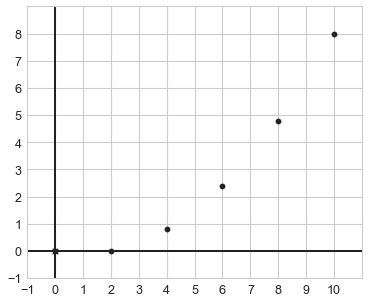

In [43]:
#plt.scatter([t for (t, _) in positions], [s for (_, s) in positions])
draw2d(Points2D(*positions))

In [44]:
def eulers_method(s0, v0, a, total_steps, steps_count):
    interval = total_steps / steps_count
    s_internal = s0
    v_internal = v0
    positions = [s0]
    for _ in range(0, steps_count):
        s_internal = add(s_internal, scale(interval, v_internal))
        v_internal = add(v_internal, scale(interval, a))
        positions.append(s_internal)

    return positions

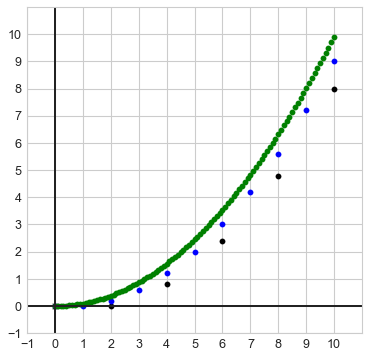

In [51]:
approx5 = eulers_method((0,0), (1,0), a, 10, 5)
approx10 = eulers_method((0,0), (1,0), a, 10, 10)
approx100 = eulers_method((0,0), (1,0), a, 10, 100)
approx1000 = eulers_method((0,0), (1,0), a, 10, 1000)

draw2d(Points2D(*approx5, color='black'),
       Points2D(*approx10, color='blue'),
       Points2D(*approx100, color='green'))
       #Points2D(*approx1000, color='red'))